## Data preparation (`keras.dataset`)

We will train our model on the MNIST dataset, which consists of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images. 

![](https://raw.githubusercontent.com/zhi-z/DeepLearning/master/Convolutional_Neural_Networks/image/mnist.png)

Since this dataset is **provided** with Keras, we just ask the `keras.dataset` model for training and test data.

We will:

* download the data
* reshape data to be in vectorial form (original data are images)
* normalize between 0 and 1.

The `binary_crossentropy` loss expects a **one-hot-vector** as input, therefore we apply the `to_categorical` function from `keras.utilis` to convert integer labels to **one-hot-vectors**.

# 使用keras框架，构建CNN网络完成对MNIST数据集的训练，评估及预测

### （1）.CNN网络

In [5]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import tensorflow as tf
from keras.utils import np_utils

### 1.1数据处理部分

In [6]:
batch_size = 128
num_classes = 10
epochs = 5

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# 幅度缩放
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
# 对数据进行转换，因为在keras中训练等对数据的数量一般要用numpy.ndarray类型
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


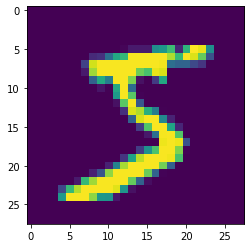

In [7]:
# 查看一下数据
import matplotlib.pyplot as plt

%matplotlib inline
plt.imshow(x_train[0].reshape(28, 28))

### 1.2 模型部分

In [8]:

# 创建一个系灌模型
model = Sequential()
# 卷积层，3*3的卷积核，后面接激活函数，relu。32个神经元
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
# 池化层
model.add(MaxPooling2D(pool_size=(2, 2)))
# 正则化
model.add(Dropout(0.25))
# 全连接层前面的shape要是n*1的，就是类似向量形式，所以沿展开
model.add(Flatten())
# 全连接
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
# 全连接，直接连接到多少个类
model.add(Dense(num_classes, activation='softmax'))

### 1.3 编译
* 告诉他用交叉熵的loss。指定优化器：optimizer=keras.optimizers.Adadelta()，评估的准则：accuracy

In [9]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [ ]:
config = tf.ConfigProto()
config.allow_soft_placement=True
config.gpu_options.per_process_gpu_memory_fraction=0.7
config.gpu_options.allow_growth = True


session = tf.Session(config=config)

### 1.4 训练

In [10]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/5


UnknownError: 2 root error(s) found.
  (0) Unknown: Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[{{node conv2d_1/convolution}}]]
	 [[metrics/accuracy/Identity/_91]]
  (1) Unknown: Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[{{node conv2d_1/convolution}}]]
0 successful operations.
0 derived errors ignored.

* 通过以上的结果可以看出，通过CNN网络能够很好的对图像进行识别，准确率很高。

### 1.5 评估

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#### 总结：通过CMN网络能够很好的识别手写图像，准确率很高。

### （2）.全连接方式

In [4]:
import numpy as np
import keras
from keras.datasets import mnist
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense,Dropout
from keras.optimizers import SGD

* Load the datasets(加载数据)

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

* 搭建网络

In [6]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.001), 
              metrics=['accuracy'])

* 对数据进行处理，切分

In [ ]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

# Put everything on grayscale
X_train /= 255
X_test /= 255

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [ ]:
# 对数据进行切分
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train)

* 查看一下数据

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.imshow(X_train[0].reshape(28, 28))

* Training

In [ ]:
# 开始训练
# epochs：表示训练的轮次
network_history = model.fit(X_train, Y_train, batch_size=128, 
                            epochs=20, verbose=1, validation_data=(X_val, Y_val))

#### 小总结：通过上面的训练训练集的准确率达到了百分之80多

* 修改以上的模型，再进行训练，看是否会有提高
* 加入Dropout层，为了缓解过拟合

In [ ]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.001), 
              metrics=['accuracy'])

* 加入Dropout后，再次训练

In [ ]:
# 开始训练
# epochs：表示训练的轮次
network_history = model.fit(X_train, Y_train, batch_size=128, 
                            epochs=20, verbose=1, validation_data=(X_val, Y_val))

* 再进行修改参数，再训练

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.001), 
              metrics=['accuracy'])
network_history = model.fit(X_train, Y_train, batch_size=128, 
                            epochs=20, verbose=1, validation_data=(X_val, Y_val))


#### 小总结：通过对模型加入Dropout后，准确率有所提高

### 总结：通过以上两种方式对手写数字进行识别可以看出，通过CNN网络模型能够更加准确的，效果更好。